# Telecommunication Company Churn Case Study

## 1. Problem Framing
### 1.1. What is Churn in this Business Context? 
Every telecommmunication industry faces a number of challenges of which includes intense competition, data security threats, high capital cost for acquiring the latest infrastructure (5G/6G), supply chain vulnerabilities, talent shortage and evolving customer demands and churns.
Amongst these challenges , customer churns remains a very threatening factor that can massively affect the growth targets of the industry
.
Generally, customer churn refers to the number of customers who end their relationship with a company within a given period 
In the telecommunication industry , churning occurs when the subscribers stop using the services. This can be attributed to a number of factors including subscribers change in preference , dissatisfaction with the services (poor network quality and bad customer service) , high and confusing bills and attractive competitor off

### 1.2	Why is it important to measure and reduce?
The telecom market is very competitive with customers having multiple provider options. This makes it very prudent to identify high risk subscribers and as well understand why customers leave. Tracking, monitoring and optimizing this metric helps in sustaining the growth of the company. How? Tracking churn rates can help the telecom company forecast revenues and set growth targets, providing a clearer picture of future business performance.

Also, it is more expensive to replace customers than to maintain existing ones 


### 1.3 Why this case study? Customer churn is one of the most common and impactful problems in subscription-based businesses such as telecommunications, banking, and streaming services. Even small reductions in churn can lead to significant improvements in revenue and customer lifetime value.

The reason for this case study is to represent a realistic business problem that combines both technical and business challenges. This study helps in understanding customer behavior, exploring patterns, building predictive models, and translating analytical results into actionable business recommendations.

By working on this churn case study, I was able to demonstrate end-to-end data science skills, including exploratory data analysis, feature engineering, model building, evaluation, and business communication. It reflects the type of problem that data analysts and data scientists are frequently asked to solve in real organizations.es 
er.


## Import Relevant Libraries

In [4]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve



# 2. Data Cleaning and Preprocessing

### 2.1 Loading and Exploration of Churn Dataset

In [7]:
#load the dataset
churn_df = pd.read_excel('churn.xlsx')

#Explore the content of the dataset to help identify the relevant indicators 
churn_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
# Get a concise information on the index datatypes and indicators, non-null values and memory usage 
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [138]:
# check for Nan values
churn_df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
tenure_group           0
is_long_tenure         0
avg_monthly_spend      0
num_services           0
high_monthly_charge    0
dtype: int64

In [140]:
# inspect the records with missing TotalCharges. Total charges are dependent on tenure and monthly charges
missing_records_df = churn_df[churn_df['TotalCharges'].isna()]
missing_records_df[['tenure','MonthlyCharges','TotalCharges']]


,tenure,MonthlyCharges,TotalCharges




#### Summary on the Initial Dataset Exploration 
- The dataset mostly has qualitative data with only three (3) numeric values
- **TotalCharge** is a blank string and not numeric
- **TotalCharge** variable has missing values which were as a result of **low tenure (tenure < 1month)**. Probably new subscribers
- There are no null values
- And there is a  good number of records to build a robust model for predictions

**Key Columns:**
* **ID:** customerID 
* **Demographics:** gender, SeniorCitizen, Partner, Dependents
* **Service details:** PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.
* **Contract & billing:** Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
* **Target:** Churn (Yes / No)

### 2.2 Fix Data types and Missing Values (TotalCharges)

* Convert from string to numeric
* Fill in the missing values using the approach: TotalCharges = tenure x monthly charges. I can drop them since they are less than 5% (0.0015%) of the total data but will still keep them after using the first approach.
  

In [142]:

# Convert TotalCharges to numeric and treat blanks as missing
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'].astype(str).str.strip().replace('',np.nan), errors='coerce')

# Impute missing TotalCharges using tenure x MonthlyCharges 
missing = churn_df['TotalCharges'].isna()
churn_df.loc[missing, 'TotalCharges'] = churn_df.loc[missing, 'MonthlyCharges'] * churn_df.loc[missing, 'tenure']
churn_df.info()
churn_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   object  
 2   SeniorCitizen        7043 non-null   int64   
 3   Partner              7043 non-null   object  
 4   Dependents           7043 non-null   object  
 5   tenure               7043 non-null   int64   
 6   PhoneService         7043 non-null   int64   
 7   MultipleLines        7043 non-null   int64   
 8   InternetService      7043 non-null   object  
 9   OnlineSecurity       7043 non-null   int64   
 10  OnlineBackup         7043 non-null   int64   
 11  DeviceProtection     7043 non-null   int64   
 12  TechSupport          7043 non-null   int64   
 13  StreamingTV          7043 non-null   int64   
 14  StreamingMovies      7043 non-null   int64   
 15  Contract             

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
tenure_group           0
is_long_tenure         0
avg_monthly_spend      0
num_services           0
high_monthly_charge    0
dtype: int64

### 2.3 Target Variable (churn) Validation and Encoding

In [15]:
# get the frequency of unique values
churn_count= churn_df['Churn'].value_counts()
churn_count

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
# Get the churn rate 
churn_rate = churn_count['Yes']/ churn_count.sum()
print("Churn rate: ", round(churn_rate * 100,2), "%", "of customers")


Churn rate:  26.54 % of customers


The churn rate indicates a **class imbalance** (i.e. **26.54% churn (Inactive Customers)** against **73.46% non - churn (Active Customers)**)

In [18]:
# Encode target: Yes = 1 and No = 0 
churn_df['Churn'] = churn_df['Churn'].map({'Yes':1,'No':0})
churn_df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

# 3. Exploratory Data Analysis
This step is mainly to help :
* understand the customers behaviour
* discover the churn patterns
* help choose better features for building our predictive models
* make the results explainable to the company's stakeholders.

The following areas will be explored.

1. Understanding the target variable (churn)
2. How tenure reflects loyalty (compare churn with customer tenure)
3. Pricing analysis
4. Contract type and commitment 
5. Service Adoption and engagement
6. payment method and churn
7. Demographics and household context
8. Outlier Analysis

In [20]:
# Generate a statistical summary of the numerical columns in the dataset
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


#### (a) Churn Analysis 


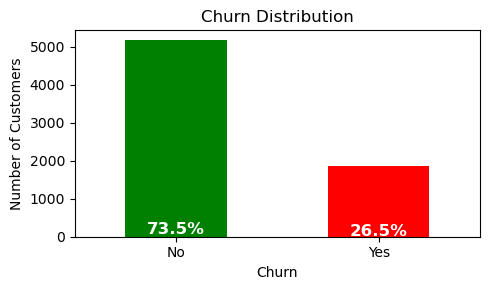

In [22]:
#plot the bar graph showing churnned vs unchurned customers
rates = churn_df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,3))

bars = plt.bar(rates.index, rates.values, color=['green', 'red'], width = 0.3)

churn_count.plot(kind='bar', color=['green','red'])
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.title('Churn Distribution')
plt.xticks(rotation = 0)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.50,
             f"{yval:.1f}%", ha='center',fontsize=12, fontweight = 'bold',color='white')

plt.tight_layout()
plt.show()

#### Interpretation
From the visuals,there is a clear indication of a moderate **class imbalance**. The chart shows that most customers are retained (approximately 73%) but a meaningful proportion which is about one-fourth (approximately 27%) still churn justifying the need to build a predictive model to target retention strategies.

#### (b) Compare churn with customer tenure
Creating a tenure group helps in identifying the various **customer lifecycle stages** rather than just using the numeric splits. 
Below is the definition of the groups i would use in my analysis.
| Group        | Tenure range          | Business meaning               |
| ------------ | --------------------- | ------------------------------ |
| 0–6 months   | New customers         | Highest risk onboarding period |
| 7–12 months  | Early-stage customers | Still forming loyalty          |
| 13–24 months | Established cust  | omerModely stable        |
| 25–48 months | Loyal customers       | Lower churn likelihood         |
| 49–72 months | Long-term customers   | Most stable segment      
     |


In [25]:
#Identifying the unique values in the tenure column
tenure=churn_df['tenure'].sort_values().unique()
print(tenure)

# put the tenure into groups to make the analysis simple. 
bins  = [0, 6, 12, 24, 48, 72]
labels = ['0-6mth', '7-12mth', '13-24mth', '25-48mth', '49-72mth']
churn_df['tenure_group'] = pd.cut(churn_df['tenure'], bins=bins, labels=labels, include_lowest=True)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]


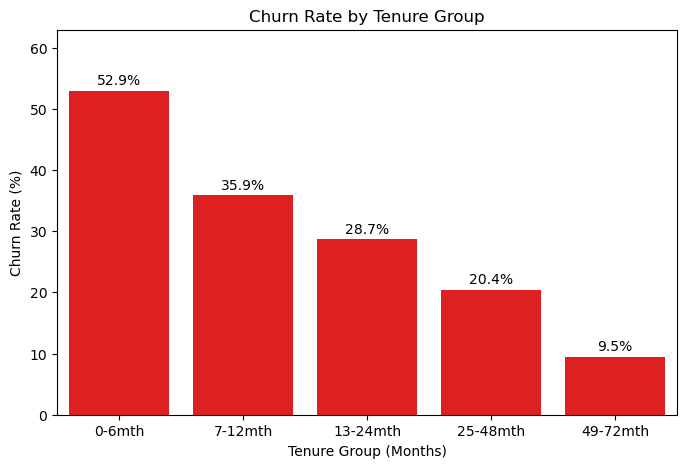

In [26]:
churn_by_tenure = pd.crosstab(churn_df['tenure_group'], churn_df['Churn'], normalize='index') * 100

x = churn_by_tenure.index
y = churn_by_tenure[1].values

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x=x, y=y, color='red')

# Labels
plt.title("Churn Rate by Tenure Group")
plt.xlabel("Tenure Group (Months)")
plt.ylabel("Churn Rate (%)")

# Force y-axis higher so labels are visible
ax.set_ylim(0, max(y) + 10)

# Add labels safely
for i, v in enumerate(y):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)

plt.show()

#### Interpretation 
The chart shows a strong relationship between customer tenure and churn. Customers in the first **0–6 months** have the highest churn rate, while churn decreases steadily as tenure increases. Customers with **more than 48 months** of tenure show the lowest churn levels. This suggests that the early customer lifecycle is the most critical period for retention efforts, and targeted onboarding and engagement strategies during the first few months could significantly reduce overall churn.

#### (c) Pricing Analysis (Monthly Charges distribution by churn)

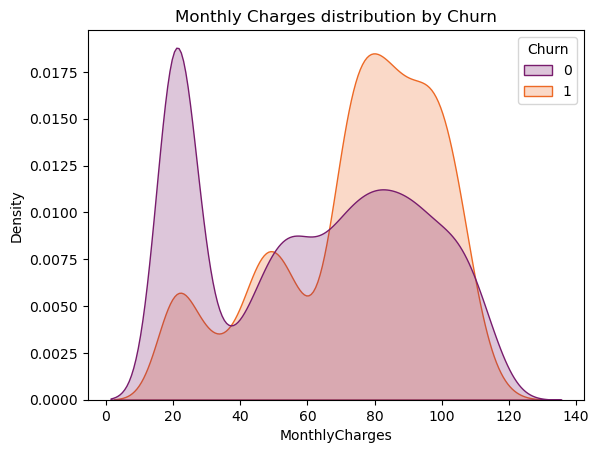

In [29]:
sns.kdeplot(data=churn_df, x='MonthlyCharges', hue='Churn', fill= True, common_norm=False, palette='inferno')
plt.title('Monthly Charges distribution by Churn')
plt.show()

#### Interpretation 
The density plot shows that customer churn seems more concentrated within the higher charge range of approximately 70 and 100 while the non churn customers are more concentrated around the lowest monthly charges around 10 and 25. This is an indication that customers paying higher monthly charges are more likely to churn. This highlights the fact that it is a key factor in customer retention.

#### (d) Contract type and commitment

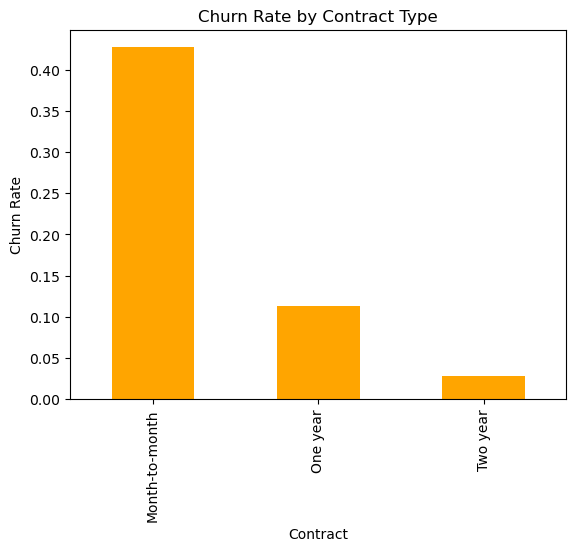

In [32]:

churn_df.groupby('Contract')['Churn'].mean().sort_values(ascending=False)

churn_df.groupby('Contract')['Churn'].mean().plot(kind='bar', color='orange')
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Contract Type")
plt.show()


#### Interpretation 
Month-to-month contracts exhibit substantially higher churn compared to longer-term contracts. Contract length appears to be one of the strongest retention levers.

### (e) Service Adoption and engagement

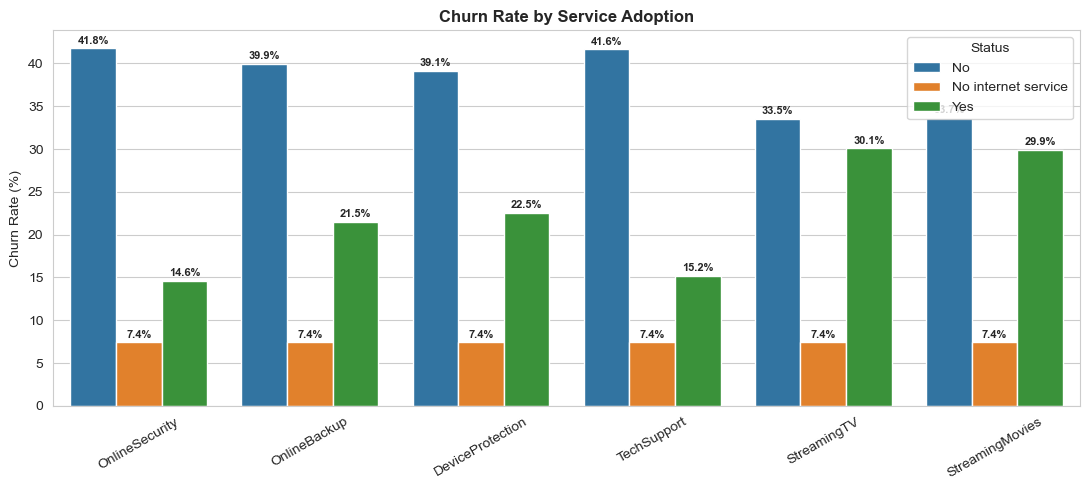

In [35]:
sns.set_style("whitegrid")

service_cols = [ 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

rows = []

for col in service_cols:
    summary = (
        churn_df.groupby(col)
          .agg(
              churn_rate=('Churn', 'mean'),
              count=('Churn', 'size')
          )
          .reset_index()
    )
    
    summary['Service'] = col
    summary.rename(columns={col: 'Status'}, inplace=True)
    rows.append(summary)

plot_df = pd.concat(rows)
plot_df['churn_rate_pct'] = plot_df['churn_rate'] * 100

plt.figure(figsize=(11,5))

ax = sns.barplot(
    data=plot_df,
    x='Service',
    y='churn_rate_pct',
    hue='Status'
)

plt.title("Churn Rate by Service Adoption", fontweight='bold')
plt.ylabel("Churn Rate (%)")
plt.xlabel("")
plt.xticks(rotation=30)

# Add % + count labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.1f}%",
            (p.get_x() + p.get_width() / 2, height),
            ha='center',
            va='bottom',
            fontsize=8,
            fontweight='bold',
            xytext=(0, 2),
            textcoords='offset points'
        )

plt.tight_layout()
plt.show()


#### Interpretation
The chart compares churn rates across three groups for each service:

* Yes → customer has the service
* No → customer does not have the service
* No internet service → baseline low-churn group

Customers who do not adopt core value-added services such as Online Security and Tech Support exhibit churn rates above 40%, while customers who adopt these services churn at rates closer to 15–22%. This suggests that service adoption is strongly associated with retention and represents a major opportunity for targeted bundling and upselling strategies.

#### (f) Demographics and Household Context

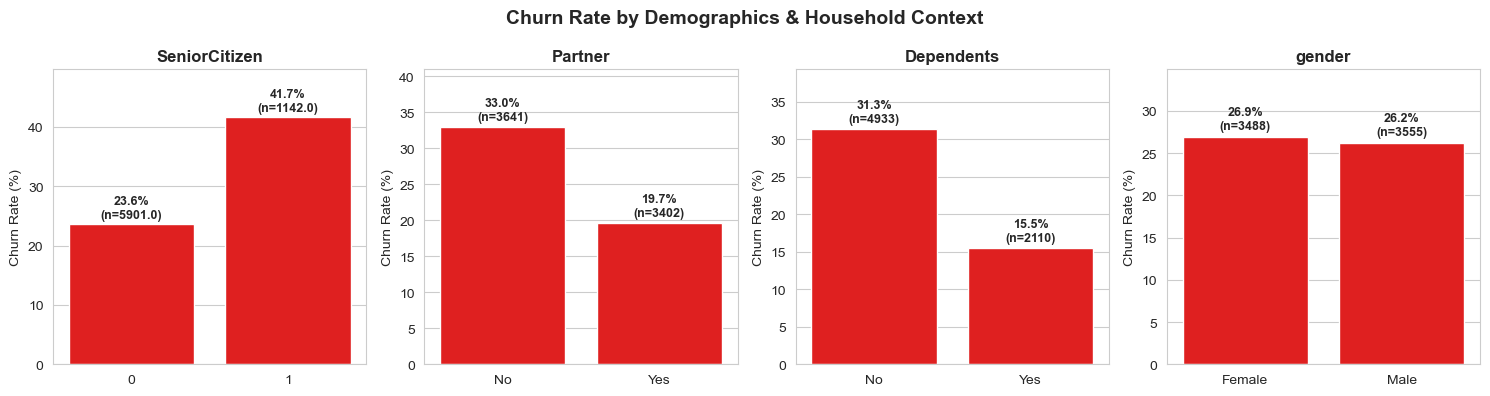

In [38]:

sns.set_style("whitegrid")

demo_cols = ['SeniorCitizen', 'Partner', 'Dependents','gender']
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
fig.suptitle("Churn Rate by Demographics & Household Context", fontsize=14, fontweight='bold')

for ax, col in zip(axes, demo_cols):

    # Build summary
    summary = (
        churn_df.groupby(col)
          .agg(churn_rate=('Churn', 'mean'),
               count=('Churn', 'size'))
          .reset_index()
    )
    summary['churn_rate_pct'] = summary['churn_rate'] * 100

    # Plot
    sns.barplot(data=summary, x=col,y='churn_rate_pct',ax=ax, color='red')

    ax.set_title(col, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("Churn Rate (%)")
    ax.set_ylim(0, summary['churn_rate_pct'].max() + 8)

    # Add labels (% + count)
    for i, row in summary.iterrows():
        ax.text( i, row['churn_rate_pct'] + 1,
            f"{row['churn_rate_pct']:.1f}%\n(n={row['count']})",
            ha='center',fontsize=9,fontweight='bold'
        )

plt.tight_layout()
plt.show()


#### Interpretation 
The graphs show that senior citizens exhibit higher churn compared to non-senior customers. Additionally, customers without partners and without dependents consistently show higher churn rates than those in household-based segments. This suggests that family-based customers are more stable, while individual customers may require stronger engagement and retention strategies.

#### (h) Churn rate by payment method

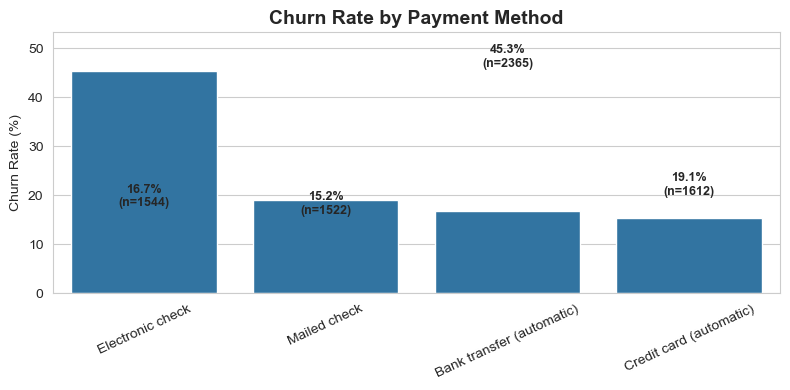

In [41]:
sns.set_style("whitegrid")

# Build summary table
summary = (
    churn_df.groupby('PaymentMethod')
      .agg(churn_rate=('Churn', 'mean'),
           count=('Churn', 'size'))
      .reset_index()
)

summary['churn_rate_pct'] = summary['churn_rate'] * 100

# Sort by churn rate (descending for insight)
summary = summary.sort_values('churn_rate_pct', ascending=False)

# Plot
plt.figure(figsize=(8,4))

ax = sns.barplot(
    data=summary,
    x='PaymentMethod',
    y='churn_rate_pct'
)

plt.title("Churn Rate by Payment Method", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=25)

plt.ylim(0, summary['churn_rate_pct'].max() + 8)

# Add % + count labels
for i, row in summary.iterrows():
    ax.text( i, row['churn_rate_pct'] + 1,f"{row['churn_rate_pct']:.1f}%\n(n={row['count']})", ha='center',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()


#### Interpretation
Customers using electronic check exhibit the highest churn rate compared to other payment methods. In contrast, customers using automated payment methods such as credit cards and bank transfers show significantly lower churn. This suggests that customers who adopt more automated or frictionless payment methods may be more engaged and loyal, and that encouraging auto-pay adoption could be a potential retention strategy.

C:\Users\Admin\AppData\Local\Temp\ipykernel_22032\1792396450.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_22032\1792396450.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_22032\1792396450.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


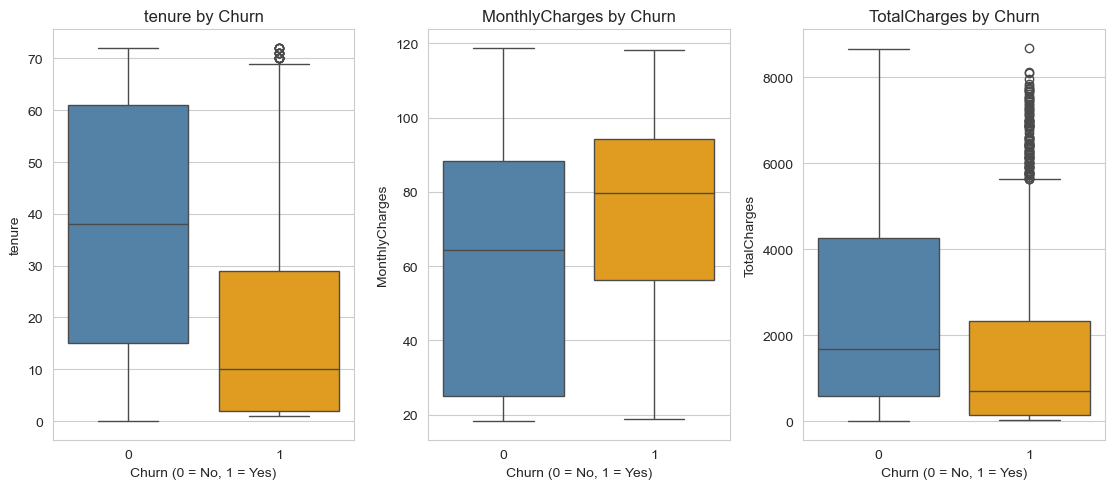

In [43]:
# Ensure Churn is numeric
churn_df['Churn'] = churn_df['Churn'].astype(int)

# Only these three variables
selected_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Layout
n_cols = 4
n_rows = 1

plt.figure(figsize=(15, 5))

for i, col in enumerate(selected_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    sns.boxplot(
        data=churn_df,
        x='Churn',
        y=col,
        palette={'0': "steelblue", '1': "orange"}
    )

    plt.title(f"{col} by Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")

plt.tight_layout()
plt.show()


#### Interpretation 
The side-by-side boxplots compare the distributions of all numeric variables. When split by churn, clear differences emerge in variables such as tenure and monthly charges. Churned customers tend to have lower tenure and slightly higher monthly charges, while retained customers show greater stability. Several high-value outliers are visible, particularly in TotalCharges, but these represent legitimate premium customers rather than data errors and were therefore retained. This visualization provides a concise overview of how numeric features differ between churned and non-churned customers.

## 4. Feature Engineering 

### 4.1 Creating New Features

#### 1. Feature for Tenure (Measure for loyalty)
From the EDA it was observed that tenure is one of the strongest churn drivers . this will be a good feature for the model to easily learn loyalty so i will create a new feature which classifies tenure into long term of short term . A customer who has stayed for at least 2 years (24 months) will be tagged with 1 and a new customer will tagged 0 representing short tenure.

#### 2. Feature for average monthly expenditure (Measure behavioural feature)
Instead of just raw total its best to consider the expenditure over time to capture spending consistency because customer on different tenure might spend the same amount in a month.

#### 3. Number of Services 
Customers who use more services are less likely to churn so it is best to capture that as a feature for building the predictive model

#### 4. High monthly charge flag 
this creates a clean behavioural indicator because from the EDA it was obvious that a higher monthly charge means more churn 



In [48]:
churn_df['is_long_tenure'] = (churn_df['tenure'] >= 24).astype(int)

churn_df['avg_monthly_spend'] = churn_df['TotalCharges'] / churn_df['tenure'].replace(0, np.nan)
churn_df['avg_monthly_spend'] = churn_df['avg_monthly_spend'].fillna(churn_df['MonthlyCharges'])

services = [ 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convert Yes/No to 1/0 first
for col in services:
    churn_df[col] = churn_df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

# Create engagement score
churn_df['num_services'] = churn_df[services].sum(axis=1)

churn_df['high_monthly_charge'] = (churn_df['MonthlyCharges'] > churn_df['MonthlyCharges'].median()).astype(int)



In [49]:
churn_df.shape

(7043, 26)

### 4.2 Correlation Matrix

In [51]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   object  
 2   SeniorCitizen        7043 non-null   int64   
 3   Partner              7043 non-null   object  
 4   Dependents           7043 non-null   object  
 5   tenure               7043 non-null   int64   
 6   PhoneService         7043 non-null   int64   
 7   MultipleLines        7043 non-null   int64   
 8   InternetService      7043 non-null   object  
 9   OnlineSecurity       7043 non-null   int64   
 10  OnlineBackup         7043 non-null   int64   
 11  DeviceProtection     7043 non-null   int64   
 12  TechSupport          7043 non-null   int64   
 13  StreamingTV          7043 non-null   int64   
 14  StreamingMovies      7043 non-null   int64   
 15  Contract             

In [52]:
# correlation matrix
final_df = churn_df
df_corr = final_df.select_dtypes(include=['int64','int32', 'float64'])

corr_matrix = df_corr.corr()
corr_matrix


,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn,is_long_tenure,avg_monthly_spend,num_services,high_monthly_charge
SeniorCitizen,1.000000,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.220173,0.103006,0.150889,0.025788,0.217917,0.095946,0.211140
tenure,0.016567,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.247900,0.826178,-0.352229,0.861296,0.247234,0.523600,0.196675
PhoneService,0.008576,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.247398,0.113214,0.011942,-0.001676,0.247267,0.127255,0.326834
MultipleLines,0.142948,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.490434,0.468504,0.040102,0.278689,0.489311,0.538060,0.480273
OnlineSecurity,-0.038653,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.296594,0.411651,-0.171226,0.266307,0.296915,0.522362,0.155964
OnlineBackup,0.066572,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.441780,0.509226,-0.082255,0.303506,0.439759,0.599838,0.312893
DeviceProtection,0.059428,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.482692,0.521983,-0.066160,0.307266,0.481846,0.659331,0.357641
TechSupport,-0.060625,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.338304,0.431883,-0.164674,0.267892,0.338045,0.584471,0.201396
StreamingTV,0.105378,0.279756,-0.022574,0.257152,0.176207,0.282106,0.390874,0.278070,1.000000,0.533094,0.629603,0.514973,0.063228,0.237213,0.626426,0.675193,0.513717
StreamingMovies,0.120176,0.286111,-0.032959,0.258751,0.187398,0.274501,0.402111,0.279358,0.533094,1.000000,0.627429,0.520122,0.061382,0.244472,0.626279,0.677848,0.510815


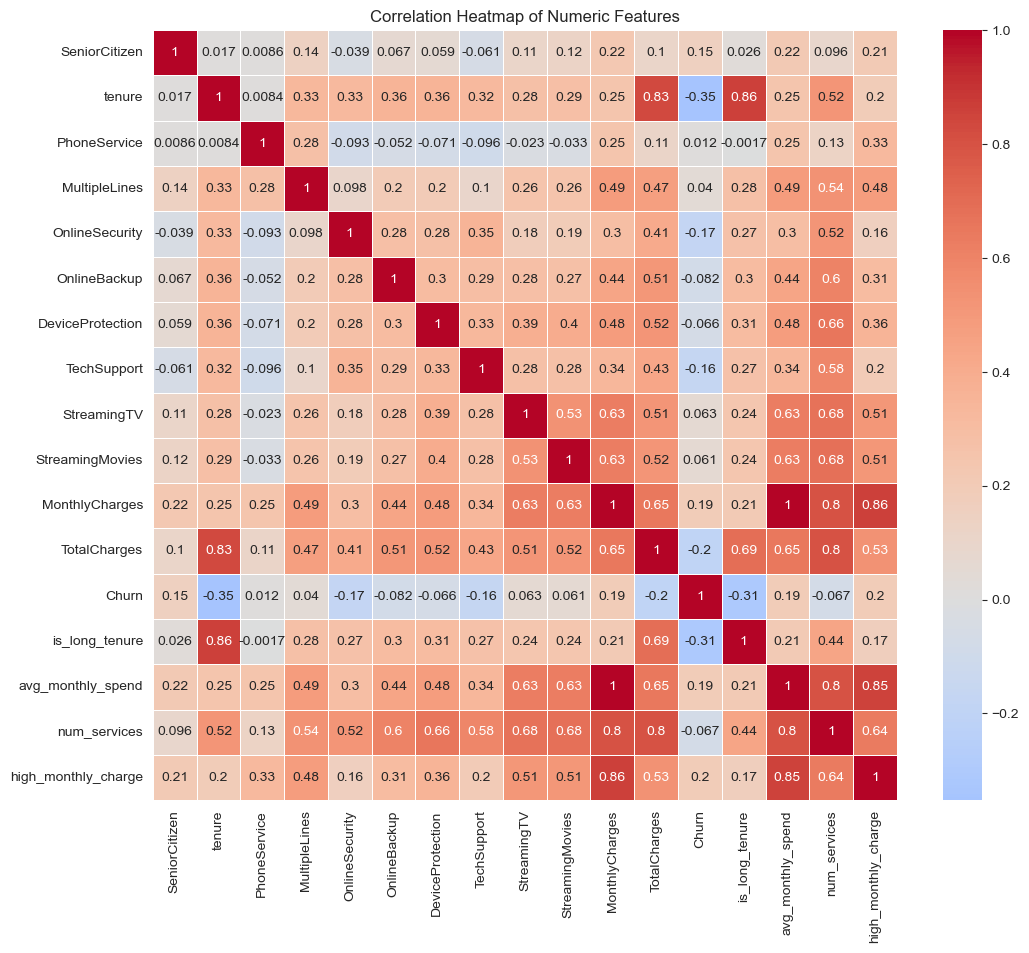

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot= True, cmap='coolwarm', center=0, linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()


#### Interpretation
The correlation analysis shows that tenure has the strongest negative correlation with churn, indicating that longer-tenure customers are significantly less likely to leave. Monthly charges show a positive correlation with churn, suggesting that customers paying higher fees are more likely to churn. Contract-related features, particularly long-term contracts, are negatively correlated with churn, reinforcing the importance of contract length in customer retention. Overall, the correlation results align with earlier EDA findings and provide quantitative evidence for key churn drivers.


## 5. Model Building 
Since this is a classification problem, I would consider using the Logistic Regression Model and the Random Forest model

### 5.1 Dataset Preparation for Model Building

In [57]:
final_df.dtypes

customerID               object
gender                   object
SeniorCitizen             int64
Partner                  object
Dependents               object
tenure                    int64
PhoneService              int64
MultipleLines             int64
InternetService          object
OnlineSecurity            int64
OnlineBackup              int64
DeviceProtection          int64
TechSupport               int64
StreamingTV               int64
StreamingMovies           int64
Contract                 object
PaperlessBilling         object
PaymentMethod            object
MonthlyCharges          float64
TotalCharges            float64
Churn                     int32
tenure_group           category
is_long_tenure            int32
avg_monthly_spend       float64
num_services              int64
high_monthly_charge       int32
dtype: object

In [58]:
# get the target variable and the independent variables
X = final_df.drop(columns=['Churn','customerID','tenure_group'])
y = final_df['Churn']


#### One-Hot Encode remaining Categorical variables

In [60]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,is_long_tenure,avg_monthly_spend,num_services,high_monthly_charge
0,Female,0,Yes,No,1,0,0,DSL,0,1,...,0,Month-to-month,Yes,Electronic check,29.85,29.85,0,29.850000,1,0
1,Male,0,No,No,34,1,0,DSL,1,0,...,0,One year,No,Mailed check,56.95,1889.50,1,55.573529,3,0
2,Male,0,No,No,2,1,0,DSL,1,1,...,0,Month-to-month,Yes,Mailed check,53.85,108.15,0,54.075000,3,0
3,Male,0,No,No,45,0,0,DSL,1,0,...,0,One year,No,Bank transfer (automatic),42.30,1840.75,1,40.905556,3,0
4,Female,0,No,No,2,1,0,Fiber optic,0,0,...,0,Month-to-month,Yes,Electronic check,70.70,151.65,0,75.825000,1,1


In [61]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape of X after one-hot encoding:")
print(X.shape)
print("\nFirst 5 rows of X after one-hot encoding:")
print(X.head())

Shape of X after one-hot encoding:
(7043, 27)

First 5 rows of X after one-hot encoding:
   SeniorCitizen  tenure  PhoneService  MultipleLines  OnlineSecurity  \
0              0       1             0              0               0   
1              0      34             1              0               1   
2              0       2             1              0               1   
3              0      45             0              0               1   
4              0       2             1              0               0   

   OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0             1                 0            0            0                0   
1             0                 1            0            0                0   
2             1                 0            0            0                0   
3             0                 1            1            0                0   
4             0                 0            0            0             

In [62]:
X.head(5)

,SeniorCitizen,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,0,1,0,0,0,0,...,True,False,False,False,False,False,True,False,True,False
1,0,34,1,0,1,0,1,0,0,0,...,False,False,False,False,True,False,False,False,False,True
2,0,2,1,0,1,1,0,0,0,0,...,False,False,False,False,False,False,True,False,False,True
3,0,45,0,0,1,0,1,1,0,0,...,False,False,False,False,True,False,False,False,False,False
4,0,2,1,0,0,0,0,0,0,0,...,False,False,True,False,False,False,True,False,True,False


#### 5.2 Train Model
**(a) Logistic Regression**

#### Prepare Dataset

In [65]:

# Enough data so i would use the 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

#build model
model = LogisticRegression(max_iter=2000, solver="liblinear")
model.fit(X_train, y_train)

#train model
y_pred = model.predict(X_test)


#### Make Predictions

In [67]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

#### Evaluate MOdel

[[1392  147]
 [ 250  324]]


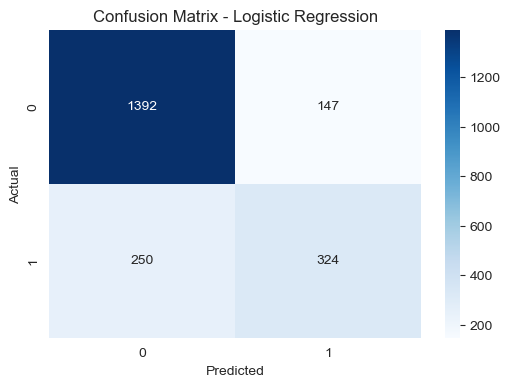

In [69]:

#Evaluating using confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [70]:
print(classification_report(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.81      2113

Precision: 0.6878980891719745
Recall: 0.5644599303135889
F1: 0.6200956937799043


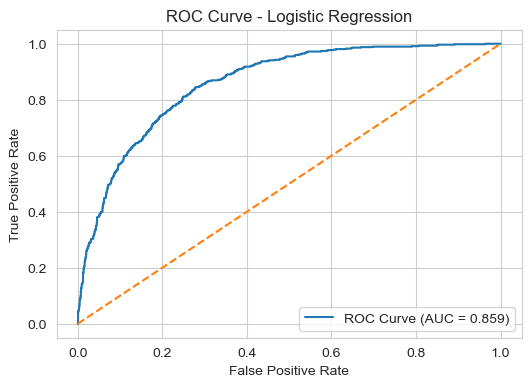

In [71]:

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [72]:
#optimizing for recall 
threshold = 0.4
y_pred_40 = (y_proba >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_40))
print(classification_report(y_test, y_pred_40))


[[1294  245]
 [ 188  386]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1539
           1       0.61      0.67      0.64       574

    accuracy                           0.80      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.80      0.80      0.80      2113



In [73]:
#optimizing for recall to catch more chunners
threshold = 0.5
y_pred_40 = (y_proba >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_40))
print(classification_report(y_test, y_pred_40))


[[1392  147]
 [ 250  324]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1539
           1       0.69      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.80      0.81      0.81      2113



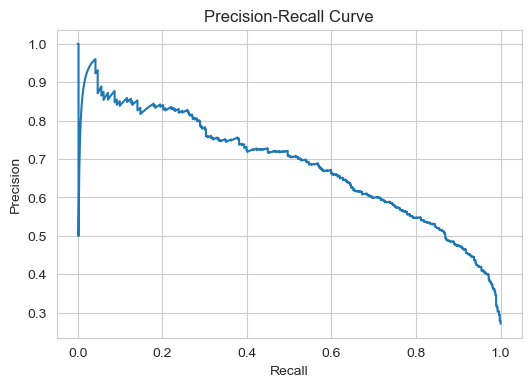

In [74]:

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



#### Summary Interpretation of all the evaluation metrics
* The logistic regression model demonstrates strong overall performance, achieving an ROC-AUC of 0.859, indicating good separation between churned and non-churned customers. 
* The confusion matrix shows that the model correctly identifies most non-churn customers and a substantial proportion of churners.
* Precision for churn prediction is 0.69, meaning that most customers flagged as high-risk are genuinely at risk.
* Recall is 0.67 after changing the threshold, suggesting that while the model captures more than half of churners, some at-risk customers are still missed.
* Overall, the model is effective for prioritizing customers for retention efforts, and performance could be further improved by optimizing the classification threshold to increase recall.
* The precision–recall curve shows the trade-off between correctly identifying churners (recall) and how accurate those churn predictions are (precision). At lower recall levels, precision is high, meaning the model is very accurate when it flags only the highest risk customers. As recall increases, precision gradually decreases, indicating that capturing more churners comes at the cost of more false positives.
* Overall, the curve suggests the model is effective at ranking customers by churn risk and allows flexibility in choosing a threshold depending on business priorities.

**(b) Random Forest Model**

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier( n_estimators=200, max_depth=10, random_state=42)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:,1]


#### Evaluate Random Forest

In [79]:
#Evaluat the model
print("Random Forest classification report:")
print(classification_report(y_test, rf_pred))

print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_proba))


Random Forest classification report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.50      0.58       574

    accuracy                           0.80      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Random Forest ROC-AUC: 0.8539483306278343


#### Summary Interpretation 
* The Random Forest model achieves an accuracy of 80% and an ROC-AUC of 0.854, indicating strong overall ability to distinguish between churned and non-churned customers.
* The model performs very well at identifying non-churn customers (recall = 0.92), but its ability to correctly identify churners is more limited (recall = 0.50), meaning it misses about half of customers who actually churn.
* When the model predicts churn, it is reasonably accurate (precision = 0.69), but overall it is slightly weaker at capturing churners compared to Logistic Regression.

#### Comparing the two models (Logistic Regression and Random Forest)

In [82]:
# Compare the two models
results = {
    "Logistic Regression": {
        "AUC": roc_auc_score(y_test, y_proba),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    },
    "Random Forest": {
        "AUC": roc_auc_score(y_test, rf_proba),
        "Precision": precision_score(y_test, rf_pred),
        "Recall": recall_score(y_test, rf_pred),
        "F1": f1_score(y_test, rf_pred)
    }
}

pd.DataFrame(results).T


,AUC,Precision,Recall,F1
Logistic Regression,0.859008,0.687898,0.564460,0.620096
Random Forest,0.853948,0.693046,0.503484,0.583249


Logistic Regression slightly outperforms Random Forest for this problem, particularly in identifying churners (higher recall and F1-score). This suggests that the relationships in the data are reasonably linear and well captured by a simpler, more interpretable model.

#### Feature Importance

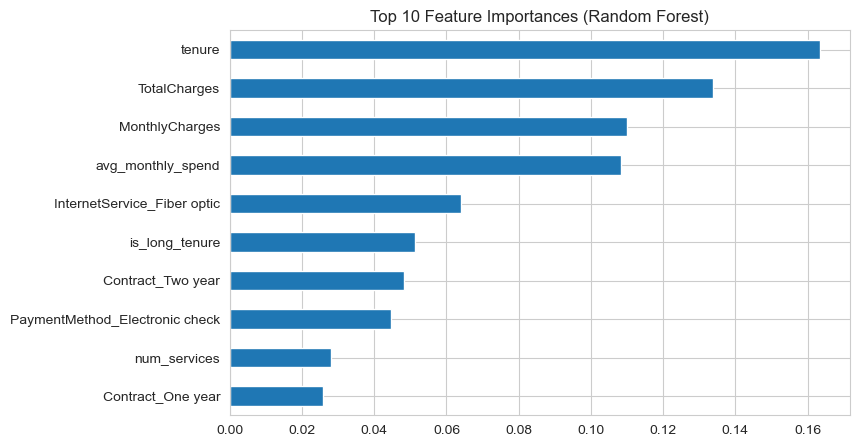

In [85]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

top_features.plot(kind='barh', figsize=(8,5))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


Feature importance analysis revealed that tenure, contract type, monthly charges, and service engagement are among the strongest predictors of churn. These results demonstrate that the model is not only predictive but also provides actionable business insights.

## 6. Business Recommendation

Based on the exploratory analysis and predictive modeling, several clear actions can be taken by the company to reduce churn.

1. **Prioritise high-risk customers for retention**

Customers with the following characteristics should be prioritised since they represent the group that are most likely to leave and therefore the company must offer the greatest opportunity for proactive intervention:
* Customers on month-to-month contracts
* Customers with short tenure (especially under 6–12 months)
* Customers with high monthly charges
* Customers with fewer subscribed services
* Customers predicted by the model to have a high churn probability

2. **Strengthen early customer experience (first 6 months)**
   EDA showed that churn is highest among new customers therfore the company must  introduce structured onboarding (welcome emails, setup guides, follow-up calls),Offer proactive support during the first 30–90 days and provide check-in surveys early in the customer lifecycle to increase engagement before dissatisfaction leads to churn.

4. **Encourage longer-term contracts**
   Customers on one-year and two-year contracts churn significantly less. The company should therefore Offer discounts or perks for switching from month-to-month to annual plans,provide loyalty rewards for contract renewals and promote long-term value rather than short-term flexibility.

5. **Review pricing and value perception**
   Customers with higher monthly charges are more likely to churn too. The company should consider offering personalized discounts for high-risk, high-paying customers,review whether premium customers feel they are receiving sufficient value and create better bundles rather than reducing services entirely

6. The company must adopt using the model operationally.The churn model can be deployed as a monthly scoring system to generate a churn probability for each active customer.The active customers can be Segmented into:

- High risk (e.g. > 0.6)
- Medium risk (0.4–0.6)
- Low risk (< 0.4)
|This provides an early high-risk list to retention and marketing teams.
